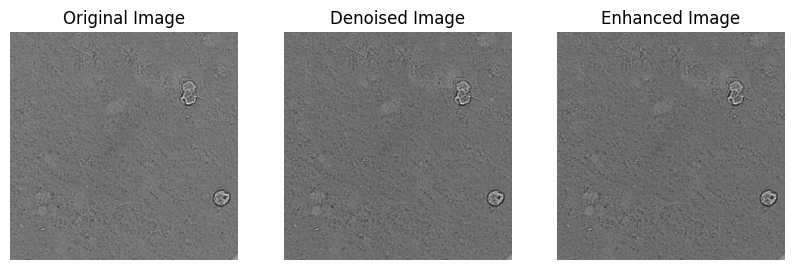

True

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('final_bf/0.png', cv2.IMREAD_GRAYSCALE)

# Step 1: Denoise the image
denoised = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Enhance edges using Laplacian filter
laplacian = cv2.Laplacian(denoised, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# Step 3: Combine the original image with the edge-enhanced image
enhanced = cv2.addWeighted(denoised, 0.8, laplacian, 0.2, 0)

# Display the results
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Denoised Image")
plt.imshow(denoised, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Enhanced Image")
plt.imshow(enhanced, cmap='gray')
plt.axis('off')

plt.show()

# Save the enhanced image
cv2.imwrite('enhanced_image.jpg', enhanced)

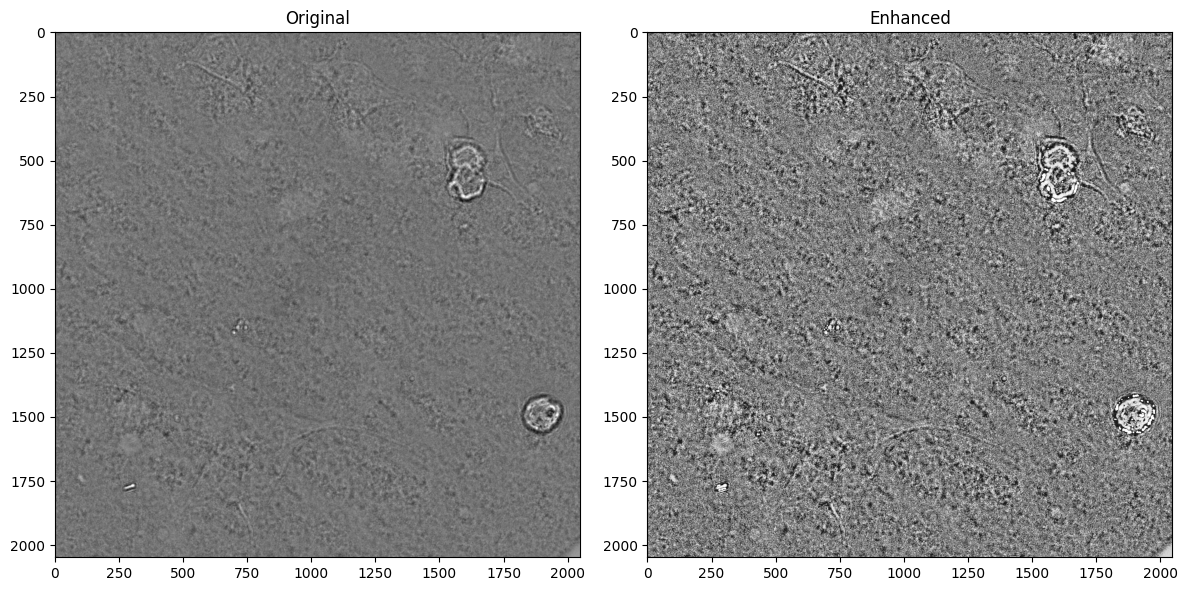

array([[ 85, 194,  40, ..., 255, 255, 208],
       [  0, 255, 255, ...,  18,  33,  96],
       [ 52, 115,   0, ..., 240, 120, 198],
       ...,
       [  0,   0,  16, ..., 210, 221, 211],
       [108, 220,   0, ..., 220, 210, 210],
       [  0,   0, 255, ..., 214, 221, 217]], dtype=uint8)

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_cell_image(image_path, output_path=None):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Create a mask for the background (darker areas)
    _, bg_mask = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY_INV)
    
    # Dilate the mask to ensure complete background coverage
    kernel = np.ones((3, 3), np.uint8)
    bg_mask = cv2.dilate(bg_mask, kernel, iterations=2)
    
    # Enhance contrast using CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(img)
    
    # Make the background white
    result = enhanced.copy()
    result[bg_mask == 255] = 255
    
    # Apply sharpening to enhance cell structures
    sharpen_kernel = np.array([[-0.5, -0.5, -0.5],
                              [-0.5,  5.0, -0.5],
                              [-0.5, -0.5, -0.5]])
    result = cv2.filter2D(result, -1, sharpen_kernel)
    
    # Save the enhanced image if output path provided
    if output_path:
        cv2.imwrite(output_path, result)
    
    # Display results
    plt.figure(figsize=(12, 6))
    plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Enhanced')
    plt.tight_layout()
    plt.show()
    
    return result

# Usage
enhance_cell_image('final_bf/0.png', 'enhanced_image.png')

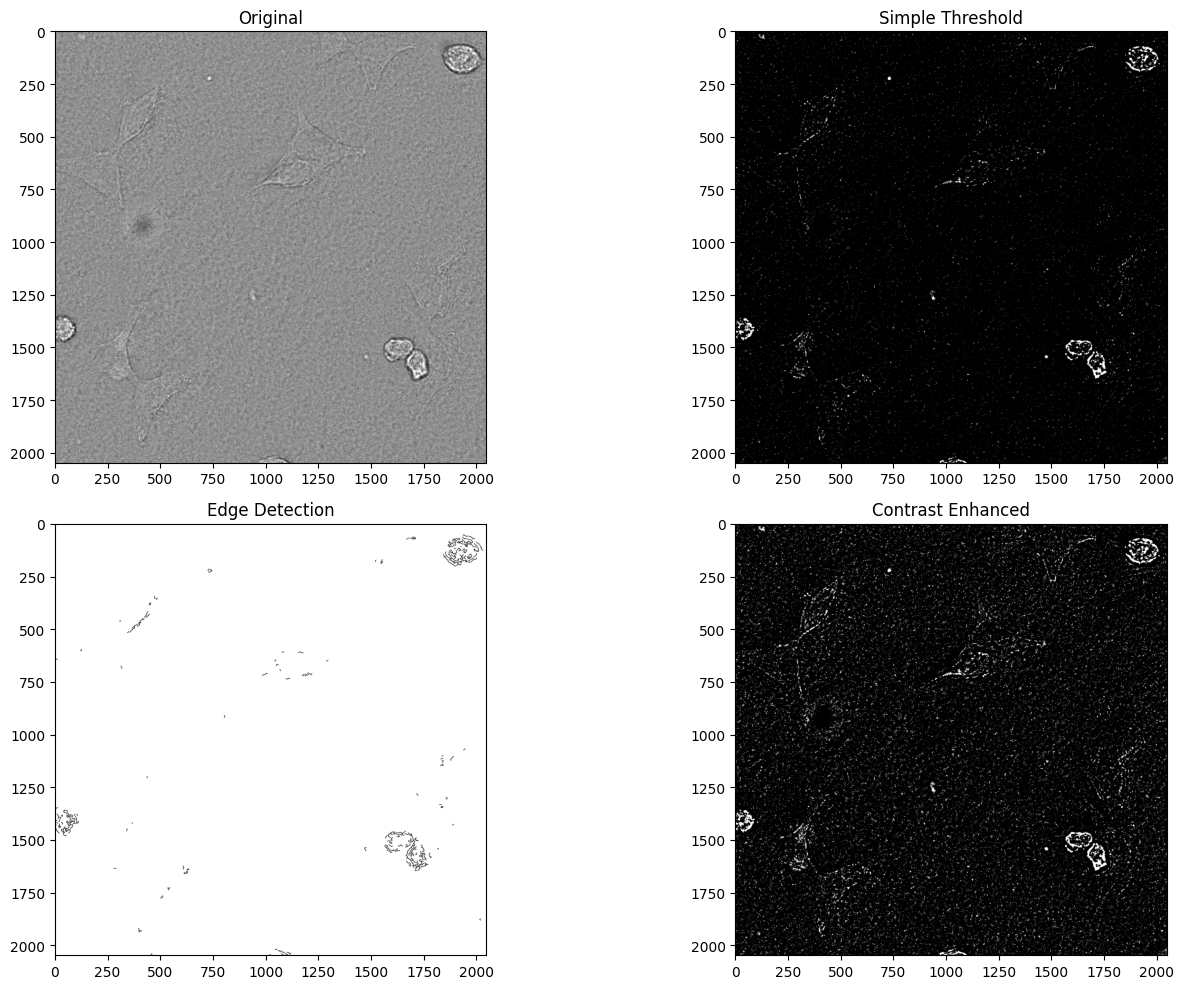

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('final_bf/507.png', cv2.IMREAD_GRAYSCALE)

# Method 1: Simple thresholding
_, result1 = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY)

# Method 2: Edge enhancement and thresholding
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)
# Use Canny edge detector
edges = cv2.Canny(blurred, 100, 200)
# Dilate the edges to make them more visible
kernel = np.ones((2,2), np.uint8)
dilated_edges = cv2.dilate(edges, kernel, iterations=1)
# Create white background with edges
result2 = np.ones_like(image) * 255
result2[dilated_edges > 0] = 0

# Method 3: Adaptive thresholding with contrast enhancement
# Enhance contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(image)
# Threshold
_, result3 = cv2.threshold(enhanced, 200, 255, cv2.THRESH_BINARY)

# Display all results for comparison
plt.figure(figsize=(15, 10))
plt.subplot(221), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(222), plt.imshow(result1, cmap='gray'), plt.title('Simple Threshold')
plt.subplot(223), plt.imshow(result2, cmap='gray'), plt.title('Edge Detection')
plt.subplot(224), plt.imshow(result3, cmap='gray'), plt.title('Contrast Enhanced')
plt.tight_layout()
plt.show()

# Save the best result (you can choose which one works best)
# cv2.imwrite('cleaned_image.jpg', result1)  # or result2 or result3

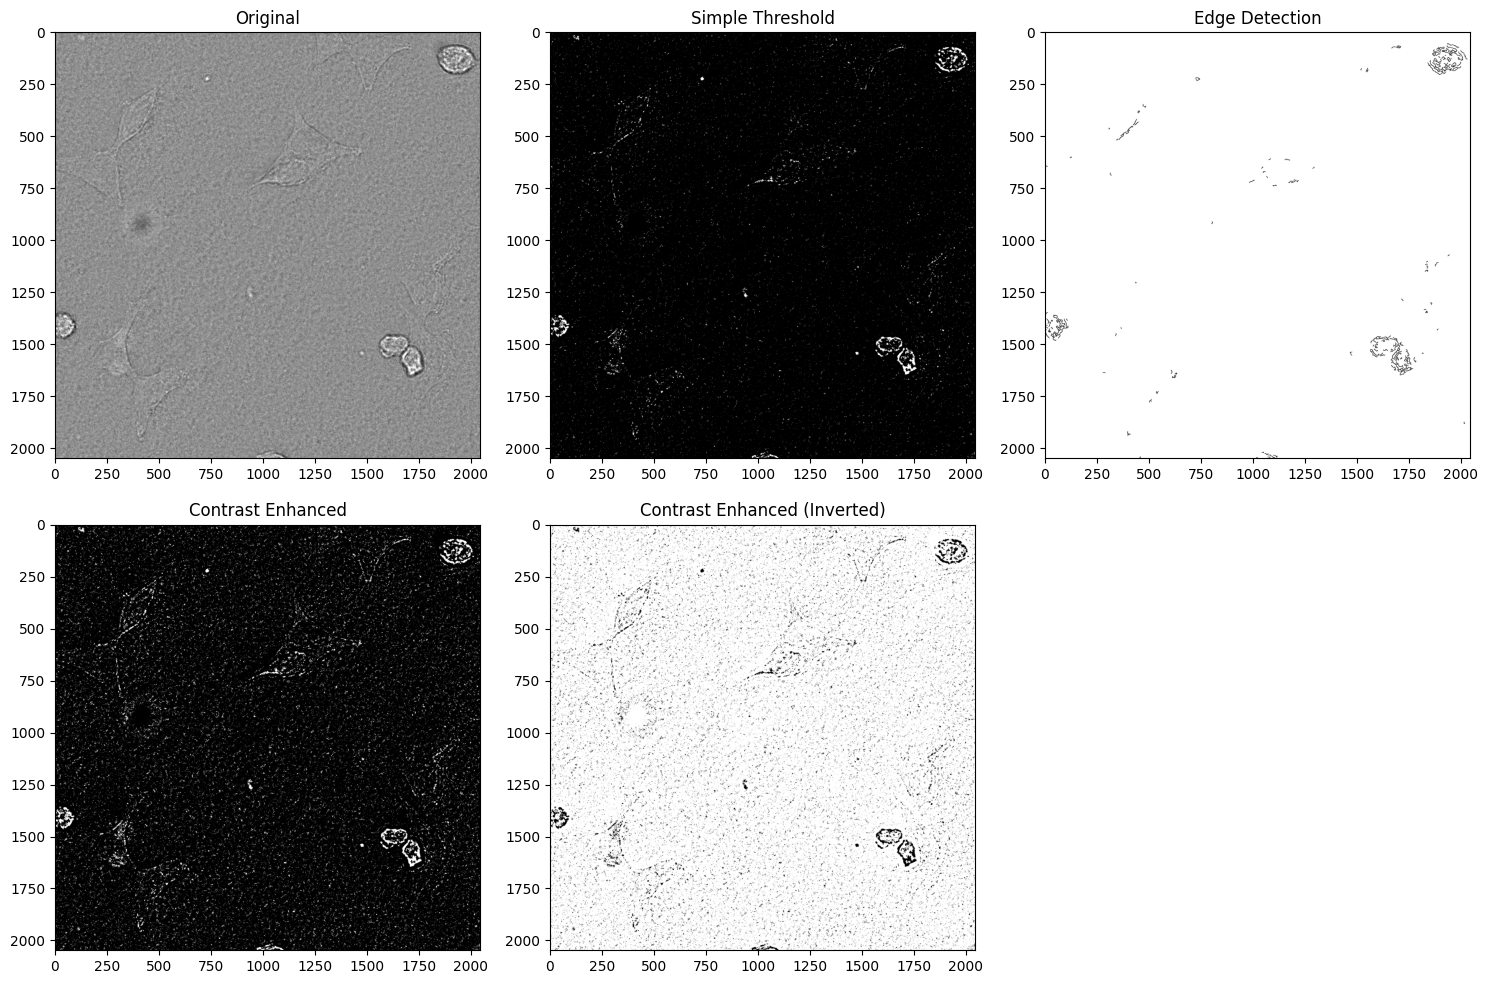

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('final_bf/507.png', cv2.IMREAD_GRAYSCALE)

# Method 1: Simple thresholding
_, result1 = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY)

# Method 2: Edge enhancement and thresholding
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)
# Use Canny edge detector
edges = cv2.Canny(blurred, 100, 200)
# Dilate the edges to make them more visible
kernel = np.ones((2,2), np.uint8)
dilated_edges = cv2.dilate(edges, kernel, iterations=1)
# Create white background with edges
result2 = np.ones_like(image) * 255
result2[dilated_edges > 0] = 0

# Method 3: Adaptive thresholding with contrast enhancement
# Enhance contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(image)
# Threshold
_, result3 = cv2.threshold(enhanced, 200, 255, cv2.THRESH_BINARY)

# Invert colors for contrast enhanced result (black->white, white->black)
result3_inverted = 255 - result3

# Display all results for comparison
plt.figure(figsize=(15, 10))
plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(232), plt.imshow(result1, cmap='gray'), plt.title('Simple Threshold')
plt.subplot(233), plt.imshow(result2, cmap='gray'), plt.title('Edge Detection')
plt.subplot(234), plt.imshow(result3, cmap='gray'), plt.title('Contrast Enhanced')
plt.subplot(235), plt.imshow(result3_inverted, cmap='gray'), plt.title('Contrast Enhanced (Inverted)')
plt.tight_layout()
plt.show()

# Save the inverted result if you prefer it
# cv2.imwrite('cleaned_image.jpg', result3_inverted)

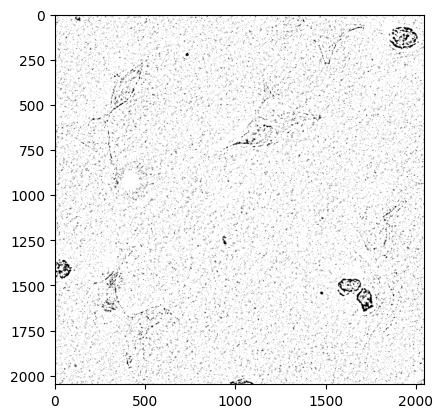

In [9]:
plt.imshow(result3_inverted, cmap='gray')

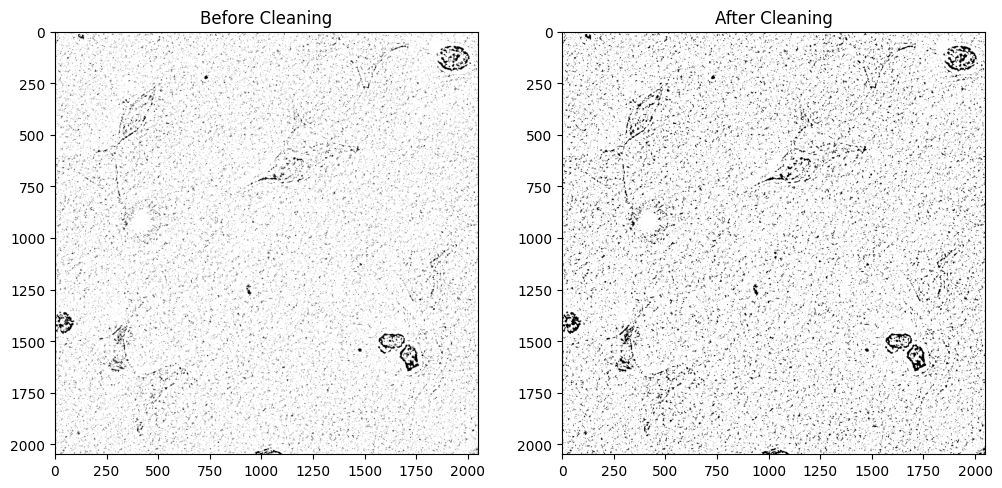

In [10]:
# Remove dots using morphological opening
# Define kernel size based on the size of dots you want to remove
kernel_size = 3  # Adjust this value as needed
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Apply morphological opening (erosion followed by dilation)
cleaned_result = cv2.morphologyEx(result3_inverted, cv2.MORPH_OPEN, kernel)

# Display comparison
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(result3_inverted, cmap='gray'), plt.title('Before Cleaning')
plt.subplot(122), plt.imshow(cleaned_result, cmap='gray'), plt.title('After Cleaning')
plt.show()

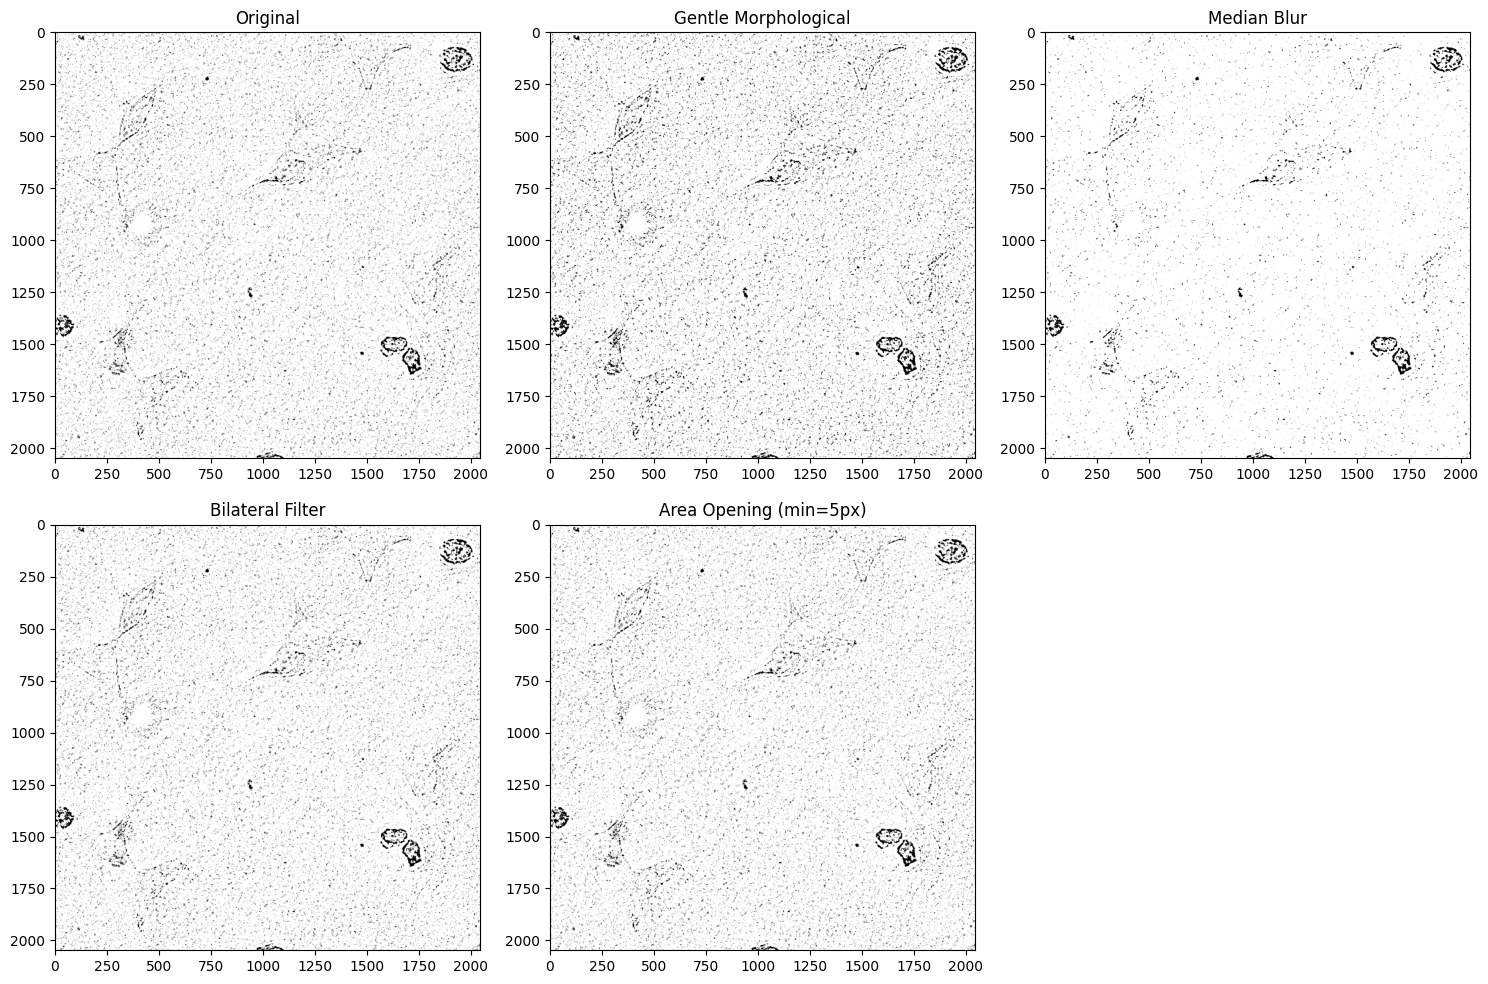

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Try these alternative approaches:

# 1. Gentler morphological operation with smaller kernel
kernel_small = np.ones((2, 2), np.uint8)
cleaned_gentle = cv2.morphologyEx(result3_inverted, cv2.MORPH_OPEN, kernel_small)

# 2. Using median blur (good for salt-and-pepper noise)
cleaned_median = cv2.medianBlur(result3_inverted, 3)  # 3 is kernel size (must be odd)

# 3. Using bilateral filter (preserves edges better)
cleaned_bilateral = cv2.bilateralFilter(result3_inverted, d=5, sigmaColor=75, sigmaSpace=75)

# 4. Area opening - remove only very tiny components
# Find all connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
    result3_inverted, connectivity=8)

# Create a new image
cleaned_area = np.zeros_like(result3_inverted)

# Very small size threshold - adjust as needed
very_small_size = 5  # Only remove very tiny dots

# Copy components that are large enough
for i in range(1, num_labels):
    if stats[i, cv2.CC_STAT_AREA] >= very_small_size:
        cleaned_area[labels == i] = 255

# Display comparison
plt.figure(figsize=(15, 10))
plt.subplot(231), plt.imshow(result3_inverted, cmap='gray'), plt.title('Original')
plt.subplot(232), plt.imshow(cleaned_gentle, cmap='gray'), plt.title('Gentle Morphological')
plt.subplot(233), plt.imshow(cleaned_median, cmap='gray'), plt.title('Median Blur')
plt.subplot(234), plt.imshow(cleaned_bilateral, cmap='gray'), plt.title('Bilateral Filter')
plt.subplot(235), plt.imshow(cleaned_area, cmap='gray'), plt.title('Area Opening (min=5px)')
plt.tight_layout()
plt.show()

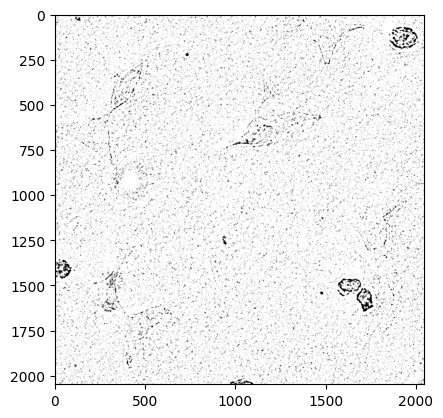

In [14]:
plt.imshow(cleaned_area,cmap='gray')